In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
import itertools
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.constants.events import (SCL5_DROPPED_PLAYERS,
                                                    SCL5_DIVISIONS,
                                                    SCL5_PICK_MODES,
                                                    SCL5_VENUE_MODES,
                                                    select_scl5_regular_season)
from triple_agent.reports.specific.mission_choices import mission_choices
from triple_agent.reports.specific.mission_completes import mission_completion_query, mission_completion
from triple_agent.classes.missions import Missions
from triple_agent.classes.venues import Venue

In [4]:
scl5_replays = get_parsed_replays(select_scl5_regular_season)

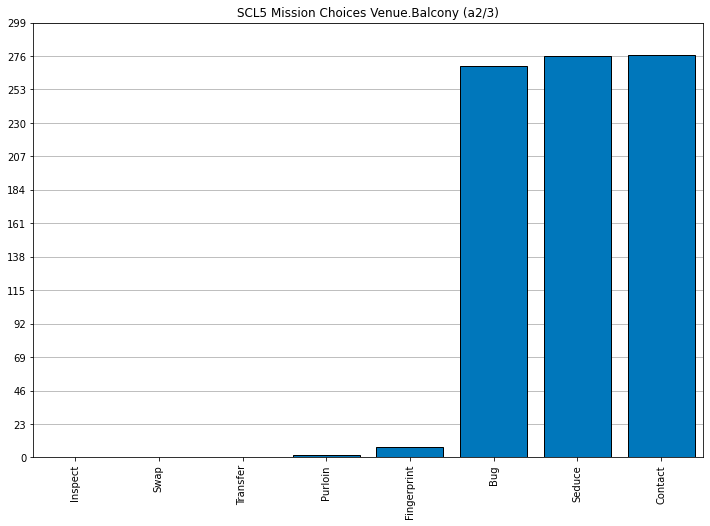

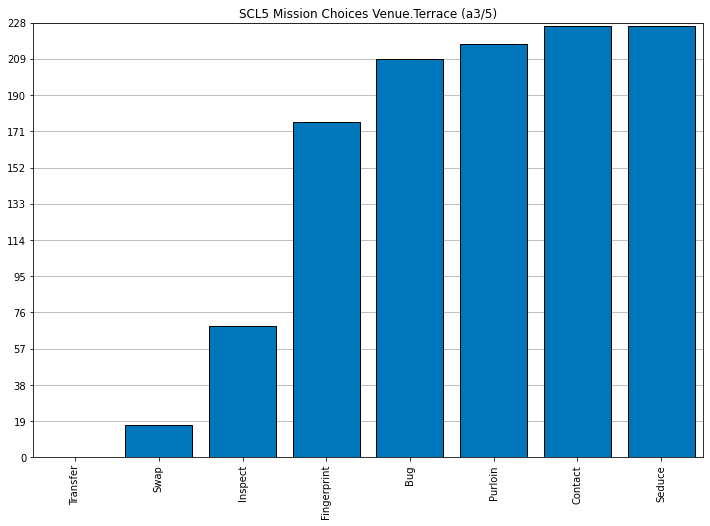

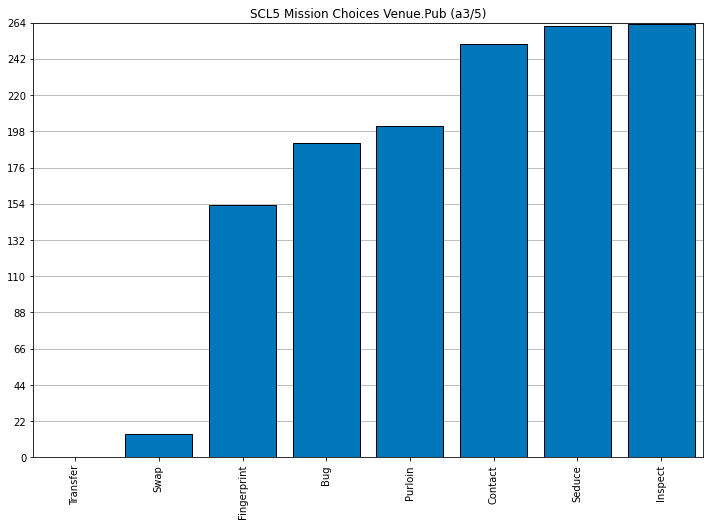

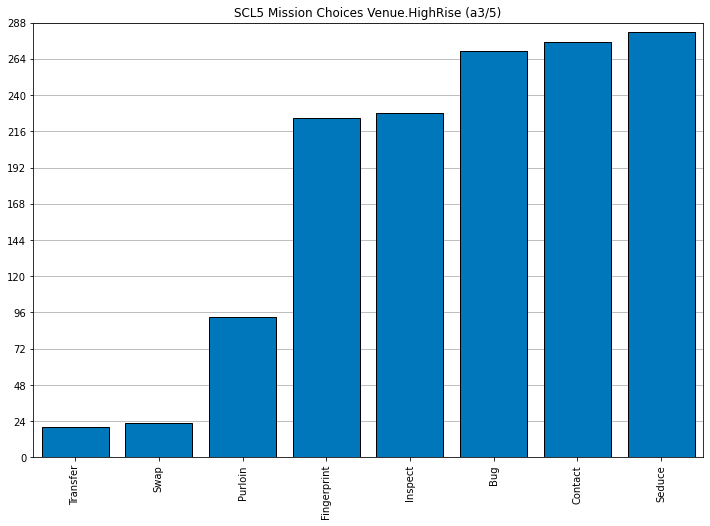

In [5]:
for venue, mode in SCL5_PICK_MODES.items():
    venue_games = filter(lambda g: g.venue==venue, scl5_replays)
    mission_choices(
        venue_games,
        DataQueryProperties(primary_order=sum),
        AxisProperties(title=f"SCL5 Mission Choices {venue} ({mode})",force_bar=True)
    )

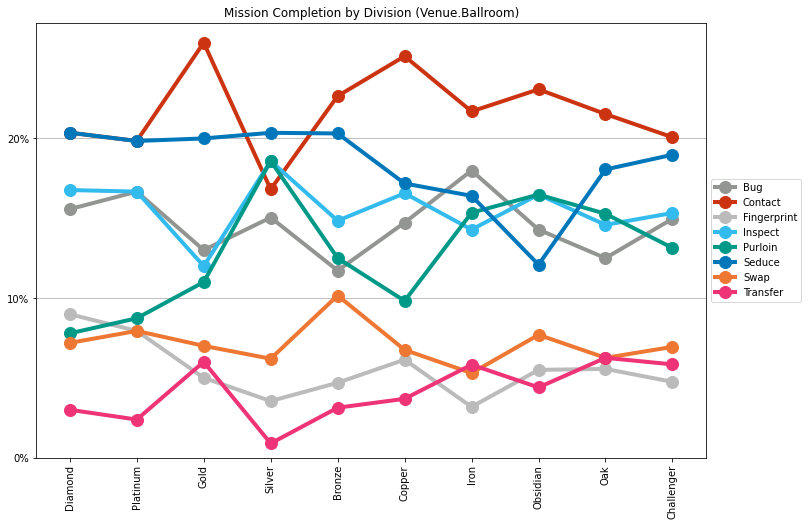

In [6]:
venue = Venue.Ballroom
scl5_mode_replays = list(filter(lambda g: g.event == 'SCL5' and g.venue==venue, scl5_replays))

_=mission_completion_query(
    scl5_mode_replays,
    DataQueryProperties(
        groupby=lambda g: g.division,
        percent_normalized_data=True,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
    ),
    AxisProperties(title=f"Mission Completion by Division ({venue})",force_line=True)
)

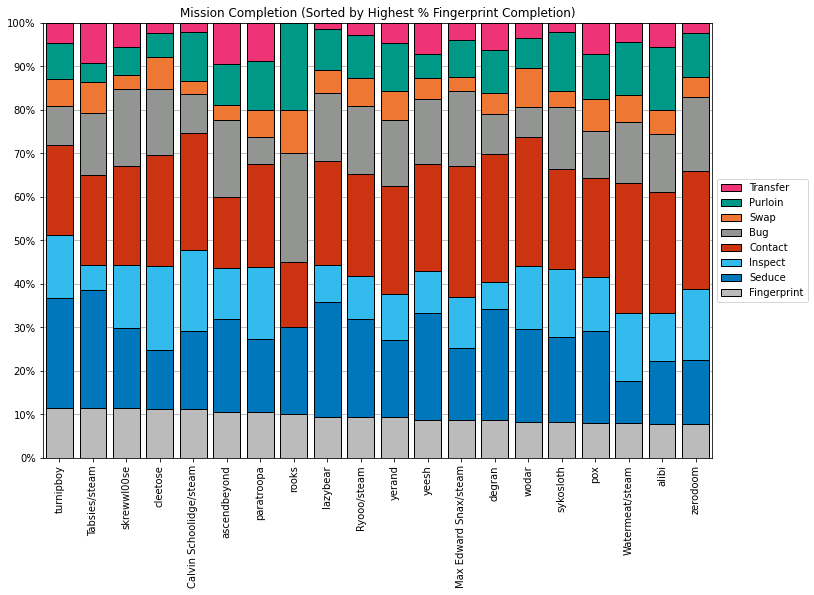

In [7]:
m = Missions.Fingerprint

_=mission_completion_query(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order = lambda name_series: name_series[1][m],
        primary_order = sorted([__m for __m in Missions if __m != Missions.NoMission], key=lambda _m: _m != m),
        limit=20,
        reverse_primary_order=True,
        reverse_secondary_order=True,
        percent_normalized_data=True,
    ),
    AxisProperties(title=f"Mission Completion (Sorted by Highest % {m.name} Completion)")
)

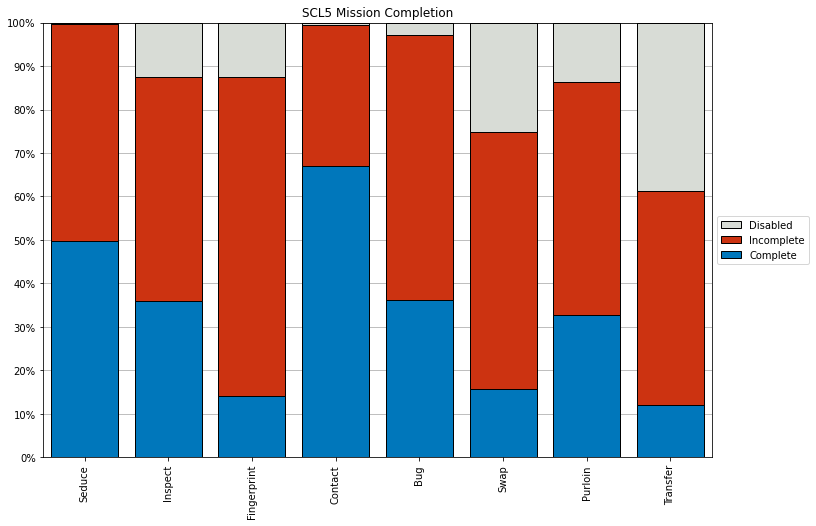

In [8]:
mission_completion(scl5_replays, "SCL5 Mission Completion")